# US009 

## · Introduction

###### This US deals with the analysis of water consumption in green spaces, using consumption data provided in a CSV file named "water_consumption". The objective of this analysis is to examine water consumption patterns over time and across different parks,calculates the total consumption and associated cost for each park, generates bar plots to visualize monthly water consumption, calculates statistics for parks with the highest and lowest consumption and identify possible outliers in the data. These insights are crucial for efficient water resource management and also for ensuring the environmental sustainability of green spaces.



## · Code and results

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


#Variables
# PATH_FILE = input('Enter the path of the file (water consumption.csv): ')

PATH_FILE = "water_consumption.csv"
WTPRC_1000M3 = 0.7
WTCONSUPTIONUPTO = 1000
WTPRC_FEE = 0.15
FIRST_MONTH = 1
LAST_MONTH = 12
CLASSES10 = 10
CLASSES100 = 100

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


##Reading file "water_consumption.csv"
data = pd.read_csv(PATH_FILE, sep=";")
data['Consumption'] = data['Consumption'].str.replace(',', '.')
data['Consumption'] = pd.to_numeric(data['Consumption'], errors='coerce')



#WaterCost by month and park

def calculate_cost(Consumption):
    if Consumption <= WTCONSUPTIONUPTO:
        return Consumption * WTPRC_1000M3
    else:
        return (WTCONSUPTIONUPTO * WTPRC_1000M3) + ((Consumption - WTCONSUPTIONUPTO) * WTPRC_1000M3 * WTPRC_FEE)

data['Total_Consumption'] = data.groupby(['Park', 'Year', 'Month'])['Consumption'].transform('sum')
consumptionInfo = data.groupby(['Park', 'Year', 'Month'])['Total_Consumption'].unique().explode().reset_index(name='Total_Consumption')
consumptionInfo['Cost'] = consumptionInfo['Total_Consumption'].apply(calculate_cost)
cost_summary = consumptionInfo.loc[:, ["Park", "Year", "Month", "Cost"]]
print("· The cost of consumption of water by each park:\n")
print(cost_summary)




In [ ]:
print("· I ) Barplot representing monthly water consumption\n")
###########################################



years = data["Year"].unique()
parks = data["Park"].str.lower().unique()

year = int(input("Enter the year: "))
text = str(years)
while year not in years:
    year = int(input(f"Enter a existent year {text}: "))

start_month = int(input("Enter the start month: "))   
while  start_month < FIRST_MONTH or start_month > LAST_MONTH: 
    start_month = int(input("INVALID: Enter a valid start month: "))
    
    
end_month = int(input("Enter the end month: "))
while end_month < FIRST_MONTH or end_month > LAST_MONTH:
    end_month = int(input("INVALID: Enter a valid end month: "))
    
while start_month > end_month:
    start_month = int(input(f"INVALID:Start month > End month ({start_month} > {end_month})\nEnter a valid start month: "))


parkId = input("Enter the Park name: ").lower()
while parkId not in parks:
    parkId = input("INVALID:Enter a existent Park id: ").lower()


filtered_data = consumptionInfo[(consumptionInfo['Park'].str.lower() == parkId) & 
                                (consumptionInfo['Year'] == year) & 
                                (consumptionInfo['Month'] >= start_month) & 
                                (consumptionInfo['Month'] <= end_month)]

sns.barplot(x="Month", y="Total_Consumption", data=filtered_data)

In [ ]:
print("· II ) Average Monthly Cost for Each Specified Park:\n")
###########################################

numberOfParks = int(input("Enter the number of Parks to see average monthly cost: "))
while numberOfParks > len(parks) or numberOfParks < 0:
    numberOfParks = int(input(f"Enter a valid number of Parks (existent parks {len(parks):.0f}): "))

if numberOfParks  != 0: 
    idParksAverage = []
    for i in range(numberOfParks):
        id = input(f"Enter the Park name (nº:{i+1}) to see average monthly cost: ")
        while id not in parks:
            id = input(f"Enter a existent Park (nº:{i+1}): ")
        while idParksAverage.__contains__(id) or id not in parks:
            id = input(f"Duplicate park, enter a new one (nº:{i+1}): ")
        idParksAverage.append(id)
    
    # Calculate average monthly cost for specified parks
    average_cost_per_park = cost_summary.groupby('Park')['Cost'].mean()
    
    # Display average monthly cost for specified parks
    for park_id in idParksAverage:
        if park_id in average_cost_per_park.index:
            print(f"Park ID: {park_id}\n ·Average Monthly Cost: {average_cost_per_park[park_id]:.2f}€")
else:
    print("ATTENTION: 0 parks selected, no average monthly cost\n")
    


In [ ]:
print("· III )")
###########################################

# Statistics
print("·· 1) Calculate statistics for the park/s with the highest and lowest consumption.\n")

##HIGHEST
print("[ Highest consumption park/s ]")
print("  --------------------------\n")
highest_consumption_park = data.groupby('Park')['Consumption'].max()
maxValue = highest_consumption_park.max()

for park_id, value in highest_consumption_park.items():
    if value == maxValue:
        park_with_highest_consumption = park_id
        # Calculate statistics for the park with the highest consumption
        highest_consumption_stats = data[data['Park'] == park_with_highest_consumption]['Consumption'].agg(['mean', 'median', 'std', 'skew'])
        highest_consumption_stats = highest_consumption_stats.rename(lambda x: f'{park_with_highest_consumption}_{x}')
        print(f"Statistics for the park ({park_with_highest_consumption} - {highest_consumption_park.max():.2f} m3):")
        print(highest_consumption_stats.to_string())
        print()


##lOWEST
print("[ Lowest consumption park/s ]")
print("  -------------------------\n")

def min_consumption_without_zero(group):
    non_zero_values = group[group != 0]  # Exclude zero values
    if non_zero_values.empty:
        return 0  # Return 0 if all values are zero
    else:
        return non_zero_values.min()


lowest_consumption_park = data.groupby('Park')['Consumption'].apply(min_consumption_without_zero)
minValue = lowest_consumption_park.min()

for park_id, value in lowest_consumption_park.items():
    if value == minValue and (not maxValue == highest_consumption_park[park_id].max()):
        park_with_lowest_consumption = park_id
        # Calculate statistics for the park with the lowest consumption
        lowest_consumption_stats = data[data['Park'] == park_with_lowest_consumption]['Consumption'].agg(['mean', 'median', 'std', 'skew'])
        lowest_consumption_stats = lowest_consumption_stats.rename(lambda x: f'{park_with_lowest_consumption}_{x}')
        print(f"Statistics for the park ({park_with_lowest_consumption} - {lowest_consumption_park.min():.2f} m3):")
        print(lowest_consumption_stats.to_string())
        print()

In [ ]:
print("· III )")
###########################################

print("·· 2) Build relative and absolute frequency tables.\n")
C = 5

##HIGHEST


print("[ Highest consumption park/s ]")
print("  --------------------------\n\n")
for park_id, value in highest_consumption_park.items():
    if value == maxValue:
        park_with_highest_consumption = park_id
        park_with_highest_consumption_data = data[data['Park'] == park_with_highest_consumption]['Consumption']
        
        n_highest = len(park_with_highest_consumption_data)
        data_min_highest = park_with_highest_consumption_data.min()
        data_max_highest = park_with_highest_consumption_data.max()
        
        # Divide em 5 classes
        class_interval_highest = (data_max_highest - data_min_highest) / C 
         # Limite inferior e superior de cada classe
        class_limits_highest = [data_min_highest + i * class_interval_highest for i in range(C+1)] 
        #Intervalos
        classes_highest = [[round(class_limits_highest[i],2) ,round(class_limits_highest[i+1],2)] for i in range(C)]
        
        #FQ absoluta
        absolute_frequencies_highest = [sum(1 for value in park_with_highest_consumption_data if class_limits_highest[i] <= value < class_limits_highest[i+1]) for i in range(C)]
        #FQ relativa
        relative_frequencies_highest = [round((freq / n_highest) *100,2) for freq in absolute_frequencies_highest] 
        #FQ acumulada
        acumulate_frequencies_highest = []
        soma = 0
        for i in absolute_frequencies_highest:
            soma += i
            acumulate_frequencies_highest.append(soma)
        
        dados = {
            "Classes": classes_highest,
            "Freq_abs": absolute_frequencies_highest,
            "Freq_rel(%)": relative_frequencies_highest,
            "Freq_acum": acumulate_frequencies_highest
        }
        
        df = pd.DataFrame(dados)
        print(f"Park : {park_id}\n")
        print(df)
        print("\n")
  
  
##lOWEST
print("[ Lowest consumption park/s ]")
print("  -------------------------\n\n")   

for park_id, value in lowest_consumption_park.items():
    if value == minValue and (not maxValue == highest_consumption_park[park_id].max()):    
        park_with_lowest_consumption = park_id
        park_with_lowest_consumption_data = data[data['Park'] == park_with_lowest_consumption]['Consumption']
        n_lowest = len(park_with_lowest_consumption_data)
        
        data_min_lowest = park_with_lowest_consumption_data.min()
        data_max_lowest = park_with_lowest_consumption_data.max()
        # Divide em 5 classes
        class_interval_lowest = (data_max_lowest - data_min_lowest) / C  
        class_limits_lowest = [data_min_lowest + i * class_interval_lowest for i in range(C+1)]  # Limite inferior e superior de cada classe        
        classes_highest = [[round(class_limits_lowest[i],2) ,round(class_limits_lowest[i+1],2)] for i in range(C)]
        
        #FQ absoluta
        absolute_frequencies_highest = [sum(1 for value in park_with_lowest_consumption_data if class_limits_lowest[i] <= value < class_limits_lowest[i+1]) for i in range(C)]
        #FQ relativa
        relative_frequencies_highest = [round((freq / n_lowest) *100,2) for freq in absolute_frequencies_highest] 
        #FQ acumulada
        acumulate_frequencies_highest = []
        soma = 0
        for i in absolute_frequencies_highest:
            soma += i
            acumulate_frequencies_highest.append(soma)
        
        dados = {
            "Classes": classes_highest,
            "Freq_abs": absolute_frequencies_highest,
            "Freq_rel(%)": relative_frequencies_highest,
            "Freq_acum": acumulate_frequencies_highest
        }
        
        df = pd.DataFrame(dados)
        print(f"Park : {park_id}\n")
        print(df)
        print("\n")

In [ ]:
print("· III )")
###########################################
print("·· 3) Find outliers.\n")


# Group the data by each park
grouped_data = data.groupby('Park')

# Iterate over each group (park)
for park, group in grouped_data:
    # Calculate median and interquartile range (IQR)
    median = group['Consumption'].median()
    q1 = group['Consumption'].quantile(0.25)
    q3 = group['Consumption'].quantile(0.75)
    iqr = q3 - q1
    
    # Define outlier range
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Identify outliers
    outliers = group[(group['Consumption'] < lower_bound) | (group['Consumption'] > upper_bound)]
    
    # Print results
    if not outliers.empty:
        print(f"Park ID: {park}:\n")
        print(outliers)
        print("\n")
    else:
        print(f"No outliers found for {park}\n")

In [ ]:
print("· III )")
###########################################
print("·· 4) Histograms\n")

for park_id, value in highest_consumption_park.items():
    if value == maxValue: 
        consumption_park = data[data['Park'] == park_id]['Consumption']
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES10, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 10 Classes : Highest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES100, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 100 Classes : Highest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        

        
for park_id, value in lowest_consumption_park.items():
    if value == minValue and (not maxValue == highest_consumption_park[park_id].max()): 
        consumption_park = data[data['Park'] == park_id]['Consumption']
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES10, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 10 Classes : Lowest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()
        
        plt.figure(figsize=(10, 5))
        plt.hist(consumption_park, bins=CLASSES100, color='skyblue', alpha=0.8)
        plt.title(f'Histograma com 100 Classes : Lowest Value\n Park : {park_id}')
        plt.xlabel('Classes')
        plt.ylabel('Consumption')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

## · Formulas (Latex)

$$
\text{Cost of water} = 
\begin{cases} 
\text{Consumption} \times 0.7 & \text{if Consumption} \leq 1000 \\
(1000 \times 0.7) + ((\text{Consumption} - 1000) \times 0.7 \times 0.15) \text{     } & \text{if } 1000 \leq \text{Consumption}
\end{cases}
$$

$$
\text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

$$
\text{Median} = 
\begin{cases} 
\text{Middle value of the sorted dataset    } & \text{if $n$ is odd} \\
\frac{\text{Sum of the two middle values}}{2   } & \text{if $n$ is even}
\end{cases}
$$

$$
\text{Standard Deviation} = \sqrt{\frac{\sum_{i=1}^{n}(x_i - \bar{x})^2}{n}}
$$

$$
\text{Coefficient of Skewness} = \frac{\sum_{i=1}^{n}(x_i - \bar{x})^3}{n \times \sigma^3}
$$

$$
\text{Absolute Frequency} = {\sum_{i=1}^{c} n_i} = n

$$

$$
\text{Relative Frequency} = f_i = \frac{{n_i}}{{n}}
$$


##### Where:

$$\( \bar{x} \)\text{ - } is \text{ } the \text{ } mean$$
$$\( \sigma \)\text{ - } is \text{ } the\text{ } standard \text{ }deviation\text{ }$$
$$\( n \)\text{ - } is\text{ }  the\text{ }  number\text{ }  of\text{ }  data\text{ }  points$$









## · Analysis and Interpretation of the Results:



#####   1) Cost of Water Consumption per Park:
 Analyzing the cost of water consumption per park provides a clear understanding of the expenses associated with maintaining these green spaces. This helps identify which parks have the highest water consumption costs and can guide decisions regarding resource allocation and implementation of conservation measures.

#####  2) Monthly Water Consumption Barplot:

Bar plots representing monthly water consumption allow visualizing seasonal patterns in water consumption in each park. This can reveal peak consumption months.

#####  3) Average Monthly Cost per Park:

Calculating the average monthly cost per park offers an overview of the average expenses of each park over time. This assists in identifying cost trends and comparing the performance of different parks in terms of water usage efficiency.

#####  4) Consumption Statistics for Parks with Highest and Lowest Consumption:

This provides a detailed understanding of the distributions of water consumption in each park. This includes measures of central tendency (mean, median), dispersion (standard deviation), and distribution shape (skewness). These statistics help identify parks with extreme consumption patterns and understand the variability in the data.

#####  5) Relative and Absolute Frequency Tables:

Relative and absolute frequency tables offer a detailed view of the distribution of water consumption in specific intervals for parks with the highest and lowest consumption. This helps identify the most common consumption intervals and assess the uniformity or disparity in consumption distribution among different parks.

##### 6) Outlier Detection:

Identifying outliers in water consumption data allows pinpointing unusual observations that may indicate issues such as leaks, measurement errors, or anomalous consumption patterns. This aids in identifying areas requiring further investigation or corrective action.

#####  7) Histograms with 10 and 100 Classes:

Histograms with different numbers of classes provide a visual representation of the distribution of water consumption in each park. This allows visualizing the shape of the distribution, identifying clustering patterns, and assessing the uniformity of consumption distribution across different intervals.




## · Conclusion


This data analysis revealed interesting water consumption patterns in different parks over time. Additionally, outliers were identified in some parks, indicating cases of excessive or unusual consumption. The generated histograms provide a clear visualization of the distribution of water consumption in each park, allowing for comparison across different data classes. These insights are crucial for efficient water resource management, enabling the identification of areas that require greater attention and intervention



### US0010 

#### · Introduction
This US has the objective of knowing the preferences of the users in the park, for that we must record the usage of each equipment in a csv file and then, display them in a pie chart with the percentage of usage of each piece of equipment.

#### · Code and results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file = "EquipmentUsed.csv"

dataFrame = pd.read_csv(file)

equipmentCount = dataFrame.apply(pd.Series.value_counts).sum(axis=1)

equipmentPercentage = (equipmentCount / equipmentCount.sum()) * 100

plt.figure(figsize=(4, 4))
plt.pie(equipmentPercentage, labels=equipmentPercentage.index, autopct='%1.1f%%', startangle=0)
plt.axis('equal')
plt.title('Percentage of Equipment Usage\n\n')
plt.show()

#### · Formulas

$$

\text{n} = (\frac{{u}}{{t}}) * 100

$$


##### Where:

$$\( \text{n} \)\text{ - percentage of usage of a equipment } $$

$$\( \text{u} \)\text{ - number of times certain equipment was used } $$

$$\( \text{t} \)\text{ - total number of equipment used}  $$



## · Analysis and Interpretation of the Results:
This code starts by asking the user to write the name of the csv file to be read. Creates a dataFrame from the data, counts the number of times each equipment was used, and then finishes by generating a pie chart to visualize the percentage of equipment usage.

After reading the data from the file using Pandas and a dataFrame, "dataFrame.apply(pd.Series.value_counts).sum(axis=1)" counts the number of times each equipment was used and stores it in equipmentCount.
"equipmentPercentage = (equipmentCount / equipmentCount.sum()) * 100" uses the equipmentCount from earlier and then divides it by the total number of equipments used, finally it multiples by 100 to make the equipmentPercentage.
At last, it displays the pie chart using the data that was read using matplotlib.pyplot.

Overall, this script allows users to analyze equipment usage data from a csv file and provides a representation of the distribution of equipment usage percentages.
The graph that results from this code shows the percentage of usage of each equipment from the list given.


### US011 

#### · Introduction

This report presents an analysis of park visitor data extracted from a CSV file. Utilizing Python's pandas and matplotlib libraries, the data is processed to determine variable types and calculate proportions of park visitors recommending the park across different age groups. Additionally, boxplots are generated to visualize the monthly frequency of park use categorized by age groups.


#### · Code and results



Escalao - int | Y/N - String | Visits - int

Child group recommendation proportion: 47.3%
Adult group recommendation proportion: 54.4%
Senior group recommendation proportion: 45.5%


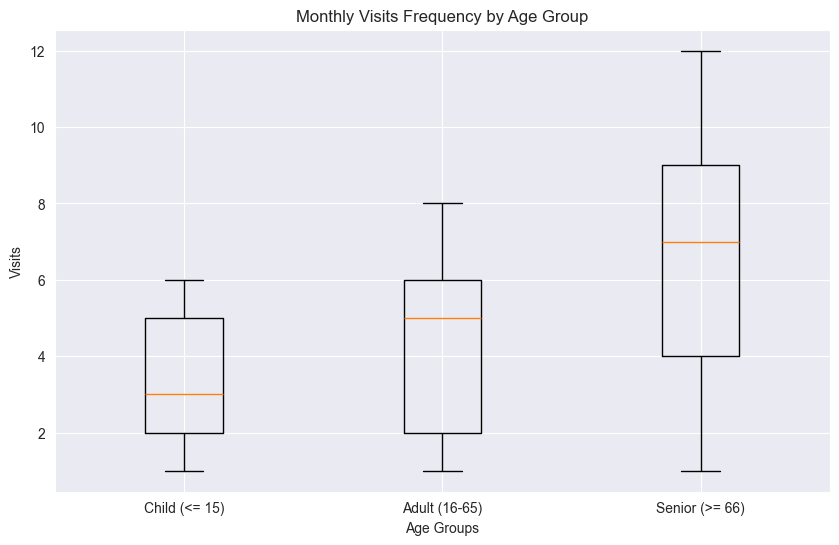

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Inquiry.csv", delimiter=';')

child = []
adult = []
senior = []

for index, escalao in enumerate(data['Escalao']):
    if escalao == 1 :
        child.append(data['Y/N'][index])
    elif escalao == 2 :
        adult.append(data['Y/N'][index])
    elif escalao == 3 :
        senior.append(data['Y/N'][index])

child = pd.Series(child)
adult = pd.Series(adult)
senior = pd.Series(senior)

child_group_recommendation_proportion = child.eq('Y').mean() if len(child) > 0 else 0.0
adult_group_recommendation_proportion = adult.eq('Y').mean() if len(adult) > 0 else 0.0
senior_group_recommendation_proportion = senior.eq('Y').mean() if len(senior) > 0 else 0.0

print(f"Escalao - int | Y/N - String | Visits - int\n")

print(f"Child group recommendation proportion: {child_group_recommendation_proportion*100:.3}%")
print(f"Adult group recommendation proportion: {adult_group_recommendation_proportion*100:.3}%")
print(f"Senior group recommendation proportion: {senior_group_recommendation_proportion*100:.3}%")

child_data = data[data['Escalao'] == 1]
adult_data = data[data['Escalao'] == 2]
senior_data = data[data['Escalao'] == 3]

plt.figure(figsize=(10, 6))
plt.boxplot([child_data['Visits'], adult_data['Visits'], senior_data['Visits']],
            labels=['Child (<= 15)', 'Adult (16-65)', 'Senior (>= 66)'])
plt.title('Monthly Visits Frequency by Age Group')
plt.xlabel('Age Groups')
plt.ylabel('Visits')
plt.grid(True)
plt.show()

This formula calculates the mean of recomendations of each age group:
$$
\text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n}
$$

Shows the range of each age group:
$$
\text{Age range} = 
\begin{cases} 
\text{Child} & \text{if } \text{Age} \leq 15 \\
\text{Adult} & \text{if } 16 \leq \text{Age} \leq 65 \\
\text{Senior} & \text{if } \text{Age} \geq 66
\end{cases}
$$

General proportion formula:
$$
\text{Proportion} = \frac{\text{Number of users who recommend the park}}{\text{Total number of users in the age group}}
$$

Proportion formula of each age group:
$$
\text{Child Group Proportion} = \frac{\text{Number of children recommending the park}}{\text{Total number of children}}\\
\text{Adult Group Proportion} = \frac{\text{Number of adults recommending the park}}{\text{Total number of adults}}\\
\text{Senior Group Proportion} = \frac{\text{Number of seniors recommending the park}}{\text{Total number of seniors}}
$$

#### · Analysis and Interpretation of the Results:
The provided code conducts an analysis of a dataset stored in a CSV file named "Inquiry.csv", focusing on age groups categorized as Child, Adult, and Senior. It first calculates the proportion of individuals within each age group who received a recommendation. It also graphs the distribution of monthly visit frequencies for each age group, using a boxplot. The analysis highlights the fact that the senior population receives greater numbers of visits, having a major impact on recommendations.


Also by analysing the graph we can observe the following topics:

**Median (line in the middle of the box):** The median is represented by the line that divides the box in half. It indicates the central value of the data. Being three the median value of Child, five of adult and seven of senior.

**Quartiles (box boundaries):** The box of the boxplot is bounded by quartiles. The first quartile (Q1) is the value below which 25% of the data lies, while the third quartile (Q3) is the value below which 75% of the data lies. The difference between Q3 and Q1 is called the interquartile range (IQR), which can be used to measure data dispersion.

**Whiskers (lines extending from the box):** The lines extending from the sides oaf the box represent the boundaries of the data not considered outliers. The length of the lines may vary depending on the implementation but usually follows a statistical rule. For example, they might be 1.5 times the IQR. Any value outside of these limits is considered an outlier.

**Outliers (points outside the whiskers):** Individual points falling outside the whisker limits are considered outliers. They may indicate extreme values or errors in the data.



# · Self Evaluation
####
#### 1230444 (Romeu Xu)            - 20%
#### 1230839 (Emmanuel Almeida)    - 20%
#### 1230564 (Francisco Santos)    - 20%
#### 1231498 (Paulo Mendes)        - 20%
#### 1231274 (Jorge Ubaldo)        - 20%